In [3]:
from sklearn import preprocessing
import pandas as pd
import numpy as np

df = pd.read_csv("src/pokemon.csv", nrows = 100000)

In [2]:
df.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

In [25]:
# LIMPIEZA
# Transforma las celdas de valores como string, a True o False.
'''
df_clean = pd.get_dummies(df, columns=["type1", "type2"])

df_clean.dropna(thresh=32)
df_clean.drop(["abilities", 'japanese_name', 'name'], axis = 1,inplace= True)

# df_clean= pd.to_numeric(df_clean.capture_rate, errors='coerce')
# df_clean.dropna(subset=['capture_rate'], inplace = True)

# X_scaled = preprocessing.scale(df_clean)
# X_scaled
'''

In [4]:
# 2Da opcion:
types1 = pd.get_dummies(df["type1"])
types2 = pd.get_dummies(df["type2"])
pd.set_option('max_rows', None)
pd.reset_option('max_rows')
types = types1 | types2


df_clean = pd.merge(df, types, left_index=True, right_index=True)

df_clean.dropna(thresh=32,inplace=True)
df_clean.drop(["type1", 'type2'], axis = 1,inplace= True)
df_clean


,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,ghost,grass,ground,ice,normal,poison,psychic,rock,steel,water
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,0,1,0,0,0,1,0,0,0,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,0,1,0,0,0,1,0,0,0,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,0,1,0,0,0,1,0,0,0,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,0,0,0,0,0,0,0,0,1,0
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,0,1,0,0,0,0,0,0,1,0
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,0,0,0,0,0,0,0,0,0,0
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,0,0,0,0,0,0,1,0,0,0


In [3]:
# Mapa de correlaciones
corr = round (df_clean.corr(), 3)
corr.style.background_gradient()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,defense,experience_growth,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary,bug,dark,dragon,electric,fairy,fighting,fire,flying,ghost,grass,ground,ice,normal,poison,psychic,rock,steel,water
against_bug,1.000000,0.230000,0.165000,-0.247000,0.240000,0.138000,0.203000,0.183000,0.129000,0.079000,-0.187000,0.148000,0.216000,0.354000,-0.463000,-0.211000,0.056000,-0.255000,-0.054000,0.062000,0.010000,-0.012000,-0.036000,0.036000,-0.061000,0.035000,-0.048000,0.005000,0.055000,-0.002000,-0.044000,-0.032000,-0.002000,0.028000,-0.090000,0.330000,-0.003000,-0.043000,-0.172000,-0.207000,-0.257000,-0.282000,-0.174000,0.464000,-0.002000,0.031000,-0.071000,-0.199000,0.458000,-0.018000,-0.176000,0.006000
against_dark,0.230000,1.000000,0.141000,-0.016000,-0.301000,-0.358000,0.011000,-0.180000,0.672000,-0.007000,-0.008000,-0.011000,-0.414000,-0.237000,-0.230000,0.012000,-0.120000,-0.002000,-0.099000,0.187000,0.024000,0.065000,0.048000,-0.008000,0.019000,0.011000,-0.098000,0.009000,0.171000,0.133000,-0.000000,0.039000,-0.016000,0.136000,-0.057000,-0.290000,-0.031000,-0.033000,-0.275000,-0.330000,-0.033000,-0.014000,0.513000,-0.018000,0.009000,-0.009000,-0.052000,-0.033000,0.661000,-0.037000,0.047000,-0.042000
against_dragon,0.165000,0.141000,1.000000,-0.109000,0.440000,0.035000,-0.262000,0.065000,-0.050000,-0.037000,-0.120000,0.350000,0.142000,-0.210000,0.100000,0.090000,-0.228000,-0.097000,0.138000,0.165000,-0.152000,0.070000,-0.024000,0.173000,0.164000,0.090000,0.062000,0.001000,0.040000,-0.047000,0.078000,0.126000,-0.025000,0.015000,-0.025000,0.067000,0.689000,-0.023000,-0.686000,0.038000,0.046000,0.065000,-0.004000,-0.038000,0.091000,0.036000,0.004000,0.039000,-0.058000,-0.016000,-0.343000,0.015000
against_electric,-0.247000,-0.016000,-0.109000,1.000000,-0.090000,-0.103000,-0.279000,-0.111000,-0.073000,0.056000,-0.269000,-0.329000,0.077000,-0.016000,-0.018000,0.417000,-0.188000,-0.298000,-0.104000,-0.062000,0.030000,-0.017000,-0.072000,-0.042000,0.003000,-0.035000,0.051000,-0.069000,0.022000,0.019000,0.111000,-0.103000,-0.063000,-0.023000,0.041000,-0.009000,-0.205000,-0.205000,-0.008000,-0.026000,-0.012000,0.487000,-0.061000,-0.302000,-0.484000,-0.012000,0.086000,-0.037000,0.003000,-0.010000,-0.052000,0.569000
against_fairy,0.240000,-0.301000,0.440000,-0.090000,1.000000,0.158000,-0.169000,0.200000,-0.121000,0.053000,-0.257000,0.274000,0.149000,0.146000,-0.145000,-0.205000,0.130000,-0.219000,0.208000,0.121000,-0.209000,0.099000,0.002000,0.146000,0.115000,0.129000,0.011000,0.177000,-0.010000,0.003000,0.065000,0.099000,0.151000,0.050000,-0.096000,0.480000,0.514000,-0.043000,-0.048000,0.475000,-0.275000,-0.002000,-0.047000,-0.067000,0.014000,0.004000,-0.039000,-0.299000,-0.025000,-0.037000,-0.246000,-0.033000
against_fight,0.138000,-0.358000,0.035000,-0.103000,0.158000,1.000000,-0.076000,-0.319000,-0.547000,0.269000,0.359000,-0.220000,-0.007000,-0.190000,-0.265000,-0.241000,0.165000,0.205000,0.149000,-0.006000,-0.089000,0.049000,0.150000,0.010000,0.059000,0.109000,0.048000,0.018000,-0.118000,-0.044000,-0.050000,0.162000,0.001000,-0.059000,-0.271000,0.308000,0.005000,-0.019000,-0.186000,0.007000,-0.040000,-0.228000,-0.345000,-0.093000,0.037000,0.275000,0.350000,-0.253000,-0.243000,0.394000,0.269000,-0.010000
against_fire,0.203000,0.011000,-0.262000,-0.279000,-0.169000,-0.076000,1.000000,0.528000,0.051000,-0.464000,-0.261000,0.186000,-0.055000,0.184000,-0.019000,0.121000,0.116000,-0.243000,-0.006000,-0.045000,0.007000,-0.062000,0.038000,-0.027000,-0.086000,-0.099000,-0.120000,0.052000,-0.089000,-0.020000,-0.079000,-0.044000,0.061000,-0.011000,0.469000,-0.043000,-0.226000,0.001000,0.005000,-0.02700

In [4]:
#Con esto se ven las correlaciones más altas
c = df_clean.corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort", ascending = False)
#so[so.keys()[0][0] != so.keys()[0][1] ]

so2 = so[(so != 1) & (so >= 0.6)]
so2


generation      pokedex_number    0.985904
pokedex_number  generation        0.985904
base_egg_steps  is_legendary      0.873488
is_legendary    base_egg_steps    0.873488
against_normal  ghost             0.774699
ghost           against_normal    0.774699
base_total      sp_attack         0.741120
sp_attack       base_total        0.741120
base_total      attack            0.730134
attack          base_total        0.730134
sp_defense      base_total        0.717434
base_total      sp_defense        0.717434
against_ghost   normal            0.700716
normal          against_ghost     0.700716
dragon          against_dragon    0.689085
against_dragon  dragon            0.689085
fairy           against_dragon    0.685517
against_dragon  fairy             0.685517
against_ghost   against_dark      0.672337
against_dark    against_ghost     0.672337
psychic         against_dark      0.661367
against_dark    psychic           0.661367
defense         base_total        0.629620
base_total 

In [5]:
df_clean.columns

Index(['against_bug', 'against_dark', 'against_dragon', 'against_electric',
       'against_fairy', 'against_fight', 'against_fire', 'against_flying',
       'against_ghost', 'against_grass', 'against_ground', 'against_ice',
       'against_normal', 'against_poison', 'against_psychic', 'against_rock',
       'against_steel', 'against_water', 'attack', 'base_egg_steps',
       'base_happiness', 'base_total', 'capture_rate', 'classfication',
       'defense', 'experience_growth', 'height_m', 'hp', 'percentage_male',
       'pokedex_number', 'sp_attack', 'sp_defense', 'speed', 'weight_kg',
       'generation', 'is_legendary', 'type1_bug', 'type1_dark', 'type1_dragon',
       'type1_electric', 'type1_fairy', 'type1_fighting', 'type1_fire',
       'type1_flying', 'type1_ghost', 'type1_grass', 'type1_ground',
       'type1_ice', 'type1_normal', 'type1_poison', 'type1_psychic',
       'type1_rock', 'type1_steel', 'type1_water', 'type2_bug', 'type2_dark',
       'type2_dragon', 'type2_electric

In [7]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

#REGRESION LINEAL
# Seleccionamos un subconjunto de 100.000 líneas que vamos a mezclar.
df_rl = df_clean.sample(frac = 1).head(100000)
# Vamos a determinar predecir el retraso en la llegada ArrDelay a partir del retraso en la salida DepDelay
col1, col2 = ["height_m", "weight_kg"]

df_rl.dropna(subset=[col1, col2], inplace = True)
Y = df_rl[col1]
X = df_rl[[col2]]




In [8]:
# A continuación ajustamos el modelo.
regr = linear_model.LinearRegression()
# Ajuste con X e Y definidos con anterioridad.
regr.fit(X, Y)
# Imprimimos el valor de las Betas... corresponden con los coeficientes de las variables dependientes 
# (en este caso sólo hay una).
print("Coeficientes: ", regr.coef_)

# El valor próximo a 1 nos indica que está cercano a la varianza, desviación al cuadrado respecto a la media.
# Estamos explicando el 86,9 % de la varianza.

Y_pred = regr.predict(X)
# R2 nos va a decir cuán bueno es el modelo, cuanto más próximo a 1, el modelo es mejor.
print("R cuadrado: ", r2_score(Y, Y_pred))

Coeficientes:  [0.00618976]
R cuadrado:  0.39256633577869215


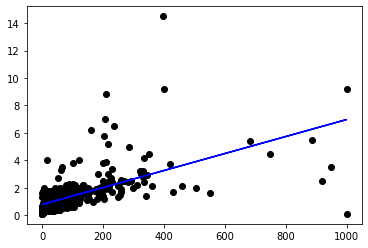

In [9]:
# Mostramos los resultados de forma gráfica, junto con la recta de regresión.
plt.scatter(X[1:10000], Y[1:10000], color = "black")
plt.plot(X[1:10000], Y_pred[1:10000], color = "blue")
plt.show()

In [5]:
# SVM- SUPPORT VECTOR MACHINE
from sklearn.svm import SVC
import numpy as np
import pandas as pd

from joblib import parallel_backend

df_fights = pd.read_csv("src/combats.csv", nrows = 100000)

In [6]:
# Limpieza y configuración de dataframes
# Se cambia el nombre de ambos IDs
df_fights.rename(columns = {'First_pokemon':'ID1', 'Second_pokemon':'ID2',
 'Winner': 'isFirstWinner'}, inplace = True)
df_fights.loc[df_fights['isFirstWinner'] == df_fights['ID1'], 'isFirstWinner'] = True
df_fights.loc[df_fights['isFirstWinner'] == df_fights['ID2'], 'isFirstWinner'] = False
df_fights.dropna(inplace=True)

df_SVM = df_clean.drop(["abilities","base_egg_steps","capture_rate","classfication", 'height_m', 'japanese_name',
 'name', 'percentage_male', 'weight_kg', 'generation', 'is_legendary']
, axis = 1)

In [7]:
# Igualamos el nombre de la columna del id a ID1
df_SVM.rename(columns = {'pokedex_number':'ID1'}, inplace= True)
#Añadimos todos los campos del 1er pokemon a la tabla
df_fights = df_fights.merge(df_SVM, on='ID1')

# Igualamos el nombre de la columna del id a ID2
df_SVM.rename(columns = {'ID1':'ID2'}, inplace= True)
#Añadimos todos los campos del 1er pokemon a la tabla
df_fights = df_fights.merge(df_SVM, on='ID2')


df_fights=df_fights.sample(frac = 0.02)
df_fights = df_fights.drop(["ID1","ID2"], axis = 1)
df_fights = df_fights[["isFirstWinner", "attack_x","defense_x", 'hp_x', 'sp_attack_x',
 'sp_defense_x', 'speed_x', "attack_y","defense_y", 'hp_y', 'sp_attack_y',
 'sp_defense_y', 'speed_y']]
df_fights =
df_fights

,isFirstWinner,attack_x,defense_x,hp_x,sp_attack_x,sp_defense_x,speed_x,attack_y,defense_y,hp_y,sp_attack_y,sp_defense_y,speed_y
5414,True,55,50,50,36,30,43,109,105,95,75,85,56
34708,False,35,40,35,35,55,50,101,53,223,97,53,43
19866,False,64,85,35,74,55,32,57,55,67,77,55,114
10801,False,165,75,64,93,83,75,64,58,58,80,65,80
25432,False,45,45,55,25,25,15,100,120,75,25,65,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27116,False,60,40,45,70,50,45,40,80,60,60,45,40
19195,True,63,152,50,53,142,35,120,95,71,120,95,99
48031,False,65,75,110,125,85,30,90,70,70,60,60,70
36410,False,110,65,160,65,110,30,35,30,30,100,35,80


In [19]:
df_fights.columns

Index(['isFirstWinner', 'attack_x', 'defense_x', 'hp_x', 'sp_attack_x',
       'sp_defense_x', 'speed_x', 'attack_y', 'defense_y', 'hp_y',
       'sp_attack_y', 'sp_defense_y', 'speed_y'],
      dtype='object')

In [8]:
n_fights = len(df_fights.axes[0])
n_train = int(n_fights * 0.9)
n_test = n_fights - n_train

df_train = df_fights.head(n_train)
df_test = df_fights.tail(n_test)

print(n_train,n_test)

900 100


In [11]:
df_train.columns

Index(['isFirstWinner', 'attack_x', 'defense_x', 'hp_x', 'sp_attack_x',
       'sp_defense_x', 'speed_x', 'attack_y', 'defense_y', 'hp_y',
       'sp_attack_y', 'sp_defense_y', 'speed_y'],
      dtype='object')

In [18]:
df_test

,isFirstWinner,attack_x,defense_x,hp_x,sp_attack_x,sp_defense_x,speed_x,attack_y,defense_y,hp_y,sp_attack_y,sp_defense_y,speed_y
10344,True,53,47,109,127,131,103,45,70,60,75,85,55
23696,True,85,70,114,85,80,30,45,45,55,25,25,15
35671,False,164,150,100,95,120,71,60,75,70,110,75,90
45717,False,40,50,55,65,85,40,100,70,80,60,70,95
37873,False,100,60,35,50,70,110,53,48,50,53,48,64
28150,True,10,10,255,75,135,55,60,65,85,135,105,100
26840,True,52,43,39,60,50,65,50,100,80,100,200,50
47698,False,69,85,55,32,35,28,55,35,35,30,30,35
17546,True,103,120,79,135,115,78,90,45,170,90,45,60
18504,True,47,52,55,40,40,41,45,50,55,45,65,80


In [9]:
Y_train = df_train["isFirstWinner"] == True

# Variable respuesta
Y_test = df_test["isFirstWinner"] == True

# Entrenando nuestro modelo

clf = SVC(kernel = "linear", cache_size= 4000, C=5) # Probad con los distintos kernels: kernel = "linear"; kernel = "poly"; kernel = "rbf"; kernel = "sigmoid"
with parallel_backend('threading', n_jobs=-1):
    clf = clf.fit(df_train.drop(["isFirstWinner"], axis = 1), Y_train)
    Y_pred_test = clf.predict(df_test.drop(["isFirstWinner"], axis = 1))

In [10]:
np.mean(Y_test == Y_pred_test)

0.53